In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/linkedin-reviews.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


EDA

Plotting the distribution of ratings

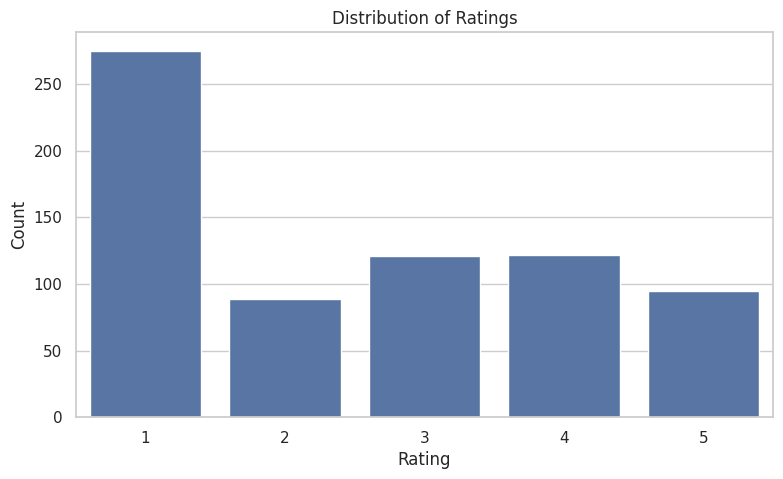

In [5]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data = df, x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# **Adding Sentiment Labels in the Data**

In [6]:
!pip install textblob

In [7]:
from textblob import TextBlob

In [8]:
def textblob_sentiment_ananlysis(review):
  sentiment = TextBlob(review).sentiment
  if sentiment.polarity > 0.1:
    return 'Positive'
  elif sentiment.polarity < -0.1:
    return 'Negative'
  else:
    return 'Neutral'

In [9]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_ananlysis)

In [10]:
df.sample(5)

,Review,Rating,Sentiment
300,Loads damn slow... Uninstalling... Desire s,2,Negative
79,very poor,1,Negative
562,Excellent update. Contact sync was a much need...,5,Positive
620,Excellent,5,Positive
641,Just updated application and wish I hadn't. No...,2,Positive


# Analyzing App Reviews Sentiments

In [13]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
Neutral,300
Positive,295
Negative,107


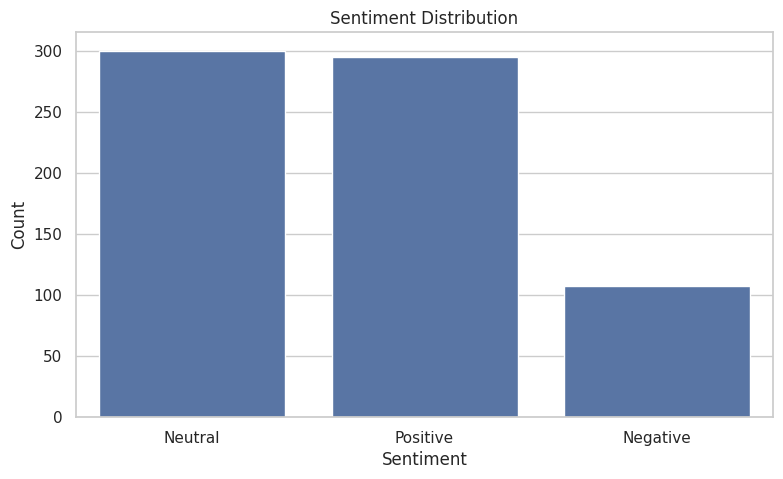

In [14]:
plt.figure(figsize=(9,5))
sns.barplot(x = sentiment_distribution.index,
            y = sentiment_distribution.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# So, we can see althrough the app has low ratings, still the reviewers don't use many negative words in the reviews for the app.

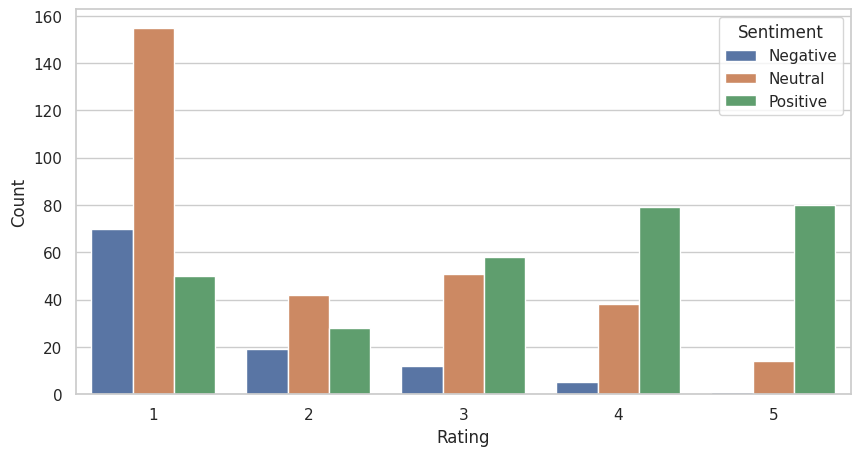

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data = df,
              x = 'Rating',
              hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()

# **Summary**
App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand use feedback, prioritize feature updates and maintain a positive user community. It involves using data analysis techniques to determine whether the sentiments in the reviews are positive, negative or neutral.